# 라이브러리 불러오기

In [ ]:
import pandas as pd
import re
# 파이플롯
import matplotlib.pyplot as plt
# 워크클라우드 라이브러리
from wordcloud import WordCloud

%matplotlib inline 
# 새 창이 아니라, 현재 창에서 표시하시오.
%config InlineBackend.figure_format = 'retina'
# 선명하게 표시하시오. 

# 크롤링 파일 불러오기

In [6]:
# 파일 불러오기
df_crawl = pd.read_csv("data/20250508_134501_익선동.csv", encoding="cp949")

In [7]:
df_crawl.shape

(576, 2)

# 데이터프레임 사용법

In [8]:
df_crawl.head()

,text,link
0,여중생 익선동 놀거리 추천!,https://kin.naver.com/qna/detail.naver?d1id=12...
1,익선동 소개팅 2차 장소 추천...,https://kin.naver.com/qna/detail.naver?d1id=12...
2,"안국동, 익선동 데이트 코스",https://kin.naver.com/qna/detail.naver?d1id=8&...
3,서울 익선동?놀거리 추천,https://kin.naver.com/qna/detail.naver?d1id=9&...
4,을지로&익선동 느낌의 어딘가?,https://kin.naver.com/qna/detail.naver?d1id=12...


In [9]:
df_crawl.head(-1)

,text,link
0,여중생 익선동 놀거리 추천!,https://kin.naver.com/qna/detail.naver?d1id=12...
1,익선동 소개팅 2차 장소 추천...,https://kin.naver.com/qna/detail.naver?d1id=12...
2,"안국동, 익선동 데이트 코스",https://kin.naver.com/qna/detail.naver?d1id=8&...
3,서울 익선동?놀거리 추천,https://kin.naver.com/qna/detail.naver?d1id=9&...
4,을지로&익선동 느낌의 어딘가?,https://kin.naver.com/qna/detail.naver?d1id=12...
...,...,...
570,남자혼자 서울여행,https://kin.naver.com/qna/detail.naver?d1id=9&...
571,서울관광 질문,https://kin.naver.com/qna/detail.naver?d1id=12...
572,서울 북촌한옥마을과 인사동 가요....,https://kin.naver.com/qna/detail.naver?d1id=9&...
573,서울여행을 3박4일 일정추천!,https://kin.naver.com/qna/detail.naver?d1id=12...


In [10]:
df_crawl.tail()

,text,link
571,서울관광 질문,https://kin.naver.com/qna/detail.naver?d1id=12...
572,서울 북촌한옥마을과 인사동 가요....,https://kin.naver.com/qna/detail.naver?d1id=9&...
573,서울여행을 3박4일 일정추천!,https://kin.naver.com/qna/detail.naver?d1id=12...
574,서울 여행 관련,https://kin.naver.com/qna/detail.naver?d1id=9&...
575,서울 지하철 타는법,https://kin.naver.com/qna/detail.naver?d1id=12...


In [11]:
# 특정 데이터를 삭제 by drop
df = df_crawl.drop(['link'],axis='columns')

In [12]:
df.shape

(576, 1)

In [13]:
df

,text
0,여중생 익선동 놀거리 추천!
1,익선동 소개팅 2차 장소 추천...
2,"안국동, 익선동 데이트 코스"
3,서울 익선동?놀거리 추천
4,을지로&익선동 느낌의 어딘가?
...,...
571,서울관광 질문
572,서울 북촌한옥마을과 인사동 가요....
573,서울여행을 3박4일 일정추천!
574,서울 여행 관련


In [14]:
# Transformation to list
list = df['text'].astype(str).tolist()

In [15]:
list

['여중생 익선동 놀거리 추천!',
 '익선동 소개팅 2차 장소 추천... ',
 '안국동, 익선동 데이트 코스',
 '서울 익선동?놀거리 추천',
 '을지로&익선동 느낌의 어딘가?',
 '종로 익선동 주차가능 고기집',
 '익선동 데이트 맛집',
 '달랭이 익선동 대창 전골 맛집으로... ',
 '익선동 갈만한곳 추천 내일 당장이여서... ',
 '익선동여행',
 '명동이 옷이 더 많나요 아니면 익선동',
 '익선동 마제 소바 맛집 초이다이닝 추천... ',
 '익선동 질문',
 '서울 익선동 한옥거리',
 '익선동 도시 내부 구조상',
 '익선동거리 명칭',
 '지명 익선동 한자이름좀',
 '서울 성수동 카페거리랑 익선동 한옥마',
 '#익선동 볼거리',
 '익선동 평일 저녁',
 '익선동 인사동 북촌',
 '익선동이 가까워 대학로가 가깝나요??',
 '익선동 놀거리',
 '익선동 한옥거리',
 '익선동 한옥거리',
 '익선동 한옥마을 운영시간',
 '익선동 놀거리 어떤게 있나요?',
 '익선동 놀거리',
 '익선동 한옥거리 일요일에 하나요?',
 '종로 인사동 익선동',
 '익선동 종로3가 이쁜카페',
 '익선동에서 청계천과 낙산공원',
 '흑석동 중대병원 앞에서 익선동 한옥거리... ',
 '익선동에서 할만한것 추천',
 '익선동 관광',
 '익선동 한옥거리',
 '익선동 일요일 (인사동)',
 '서울 핫플레이스 북촌, 삼청동, 익선동... ',
 '강남 센트럴시티에서 익선동 인사동 가는... ',
 '제가 한 두 달 전쯤 익선동 길거리에',
 '익선동주차장 저렴한곳 추천해주세요',
 '익선동 가려는데 사람많나요??',
 '익선동 맛집, 카페 종로3가역 근처로... ',
 '익선동 데이트 내공 100',
 '서울 익선동 코스',
 '익선동 카페 추천받아요',
 '익선동 프리마켓 원석 목걸이',
 '인사동 익선동 탑골공원에 대해 알려주',
 '인사동이나 익선동 갈 곳 추천좀ㅠㅠㅠ',
 '서울여행 코스질문!(익선동,쌈지길, 경복궁)',
 '익선동한옥거리',

In [16]:
# 리스트를 문자열로 변환
word_str = ' '.join(s for s in list)
# ' ' 공백을 넣어서
# join 원소들을 합친다
# list 안의 원소 s에 대하여 s들을.
# 람다 함수?

In [17]:
word_str

'여중생 익선동 놀거리 추천! 익선동 소개팅 2차 장소 추천...  안국동, 익선동 데이트 코스 서울 익선동?놀거리 추천 을지로&익선동 느낌의 어딘가? 종로 익선동 주차가능 고기집 익선동 데이트 맛집 달랭이 익선동 대창 전골 맛집으로...  익선동 갈만한곳 추천 내일 당장이여서...  익선동여행 명동이 옷이 더 많나요 아니면 익선동 익선동 마제 소바 맛집 초이다이닝 추천...  익선동 질문 서울 익선동 한옥거리 익선동 도시 내부 구조상 익선동거리 명칭 지명 익선동 한자이름좀 서울 성수동 카페거리랑 익선동 한옥마 #익선동 볼거리 익선동 평일 저녁 익선동 인사동 북촌 익선동이 가까워 대학로가 가깝나요?? 익선동 놀거리 익선동 한옥거리 익선동 한옥거리 익선동 한옥마을 운영시간 익선동 놀거리 어떤게 있나요? 익선동 놀거리 익선동 한옥거리 일요일에 하나요? 종로 인사동 익선동 익선동 종로3가 이쁜카페 익선동에서 청계천과 낙산공원 흑석동 중대병원 앞에서 익선동 한옥거리...  익선동에서 할만한것 추천 익선동 관광 익선동 한옥거리 익선동 일요일 (인사동) 서울 핫플레이스 북촌, 삼청동, 익선동...  강남 센트럴시티에서 익선동 인사동 가는...  제가 한 두 달 전쯤 익선동 길거리에 익선동주차장 저렴한곳 추천해주세요 익선동 가려는데 사람많나요?? 익선동 맛집, 카페 종로3가역 근처로...  익선동 데이트 내공 100 서울 익선동 코스 익선동 카페 추천받아요 익선동 프리마켓 원석 목걸이 인사동 익선동 탑골공원에 대해 알려주 인사동이나 익선동 갈 곳 추천좀ㅠㅠㅠ 서울여행 코스질문!(익선동,쌈지길, 경복궁) 익선동한옥거리 한옥마을 북촌VS익선동 비교...  익선동 가서 엄마랑 놀려고 하는데요 익선동 vs 인사동 익선동 한옥거리 익선동에 가성비 맛집 있을까요? 혹시 서울 익선동에 맛집 아시는곳 있 익선동저렴한맛집,카페,놀거리알려주세요! 익선동 놀거리 익선동 놀거리 코스 핫한 레트로 열풍! 익선동부터 돈의문까지 크리스마스날 익선동에 사람많을까요?? 서울 당일 친구랑 놀러갈건데 익선

In [18]:
# [python] re.sub 정규표현식을 통한 문자열 치환 (특수문자 제거)
# ref.https://clolee.tistory.com/17
def clean_text(inputString):
  text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', inputString)
  text_rmv = ' '.join(text_rmv.split())
  return text_rmv

In [19]:
word_str_cut = clean_text(word_str)

In [20]:
word_str_cut

'여중생 익선동 놀거리 추천 익선동 소개팅 2차 장소 추천 안국동 익선동 데이트 코스 서울 익선동 놀거리 추천 을지로&익선동 느낌의 어딘가 종로 익선동 주차가능 고기집 익선동 데이트 맛집 달랭이 익선동 대창 전골 맛집으로 익선동 갈만한곳 추천 내일 당장이여서 익선동여행 명동이 옷이 더 많나요 아니면 익선동 익선동 마제 소바 맛집 초이다이닝 추천 익선동 질문 서울 익선동 한옥거리 익선동 도시 내부 구조상 익선동거리 명칭 지명 익선동 한자이름좀 서울 성수동 카페거리랑 익선동 한옥마 익선동 볼거리 익선동 평일 저녁 익선동 인사동 북촌 익선동이 가까워 대학로가 가깝나요 익선동 놀거리 익선동 한옥거리 익선동 한옥거리 익선동 한옥마을 운영시간 익선동 놀거리 어떤게 있나요 익선동 놀거리 익선동 한옥거리 일요일에 하나요 종로 인사동 익선동 익선동 종로3가 이쁜카페 익선동에서 청계천과 낙산공원 흑석동 중대병원 앞에서 익선동 한옥거리 익선동에서 할만한것 추천 익선동 관광 익선동 한옥거리 익선동 일요일 인사동 서울 핫플레이스 북촌 삼청동 익선동 강남 센트럴시티에서 익선동 인사동 가는 제가 한 두 달 전쯤 익선동 길거리에 익선동주차장 저렴한곳 추천해주세요 익선동 가려는데 사람많나요 익선동 맛집 카페 종로3가역 근처로 익선동 데이트 내공 100 서울 익선동 코스 익선동 카페 추천받아요 익선동 프리마켓 원석 목걸이 인사동 익선동 탑골공원에 대해 알려주 인사동이나 익선동 갈 곳 추천좀ㅠㅠㅠ 서울여행 코스질문 익선동 쌈지길 경복궁 익선동한옥거리 한옥마을 북촌VS익선동 비교 익선동 가서 엄마랑 놀려고 하는데요 익선동 vs 인사동 익선동 한옥거리 익선동에 가성비 맛집 있을까요 혹시 서울 익선동에 맛집 아시는곳 있 익선동저렴한맛집 카페 놀거리알려주세요 익선동 놀거리 익선동 놀거리 코스 핫한 레트로 열풍 익선동부터 돈의문까지 크리스마스날 익선동에 사람많을까요 서울 당일 친구랑 놀러갈건데 익선동 익선동맛집 새우없는 경복궁 인사동 쌈지길 익선동 한옥마을 익선동 초밥 맛집 삼일절에 익선동 가려하는데 

In [23]:
# Wordcloud Library 설치
# ! python -m pip install wordcloud

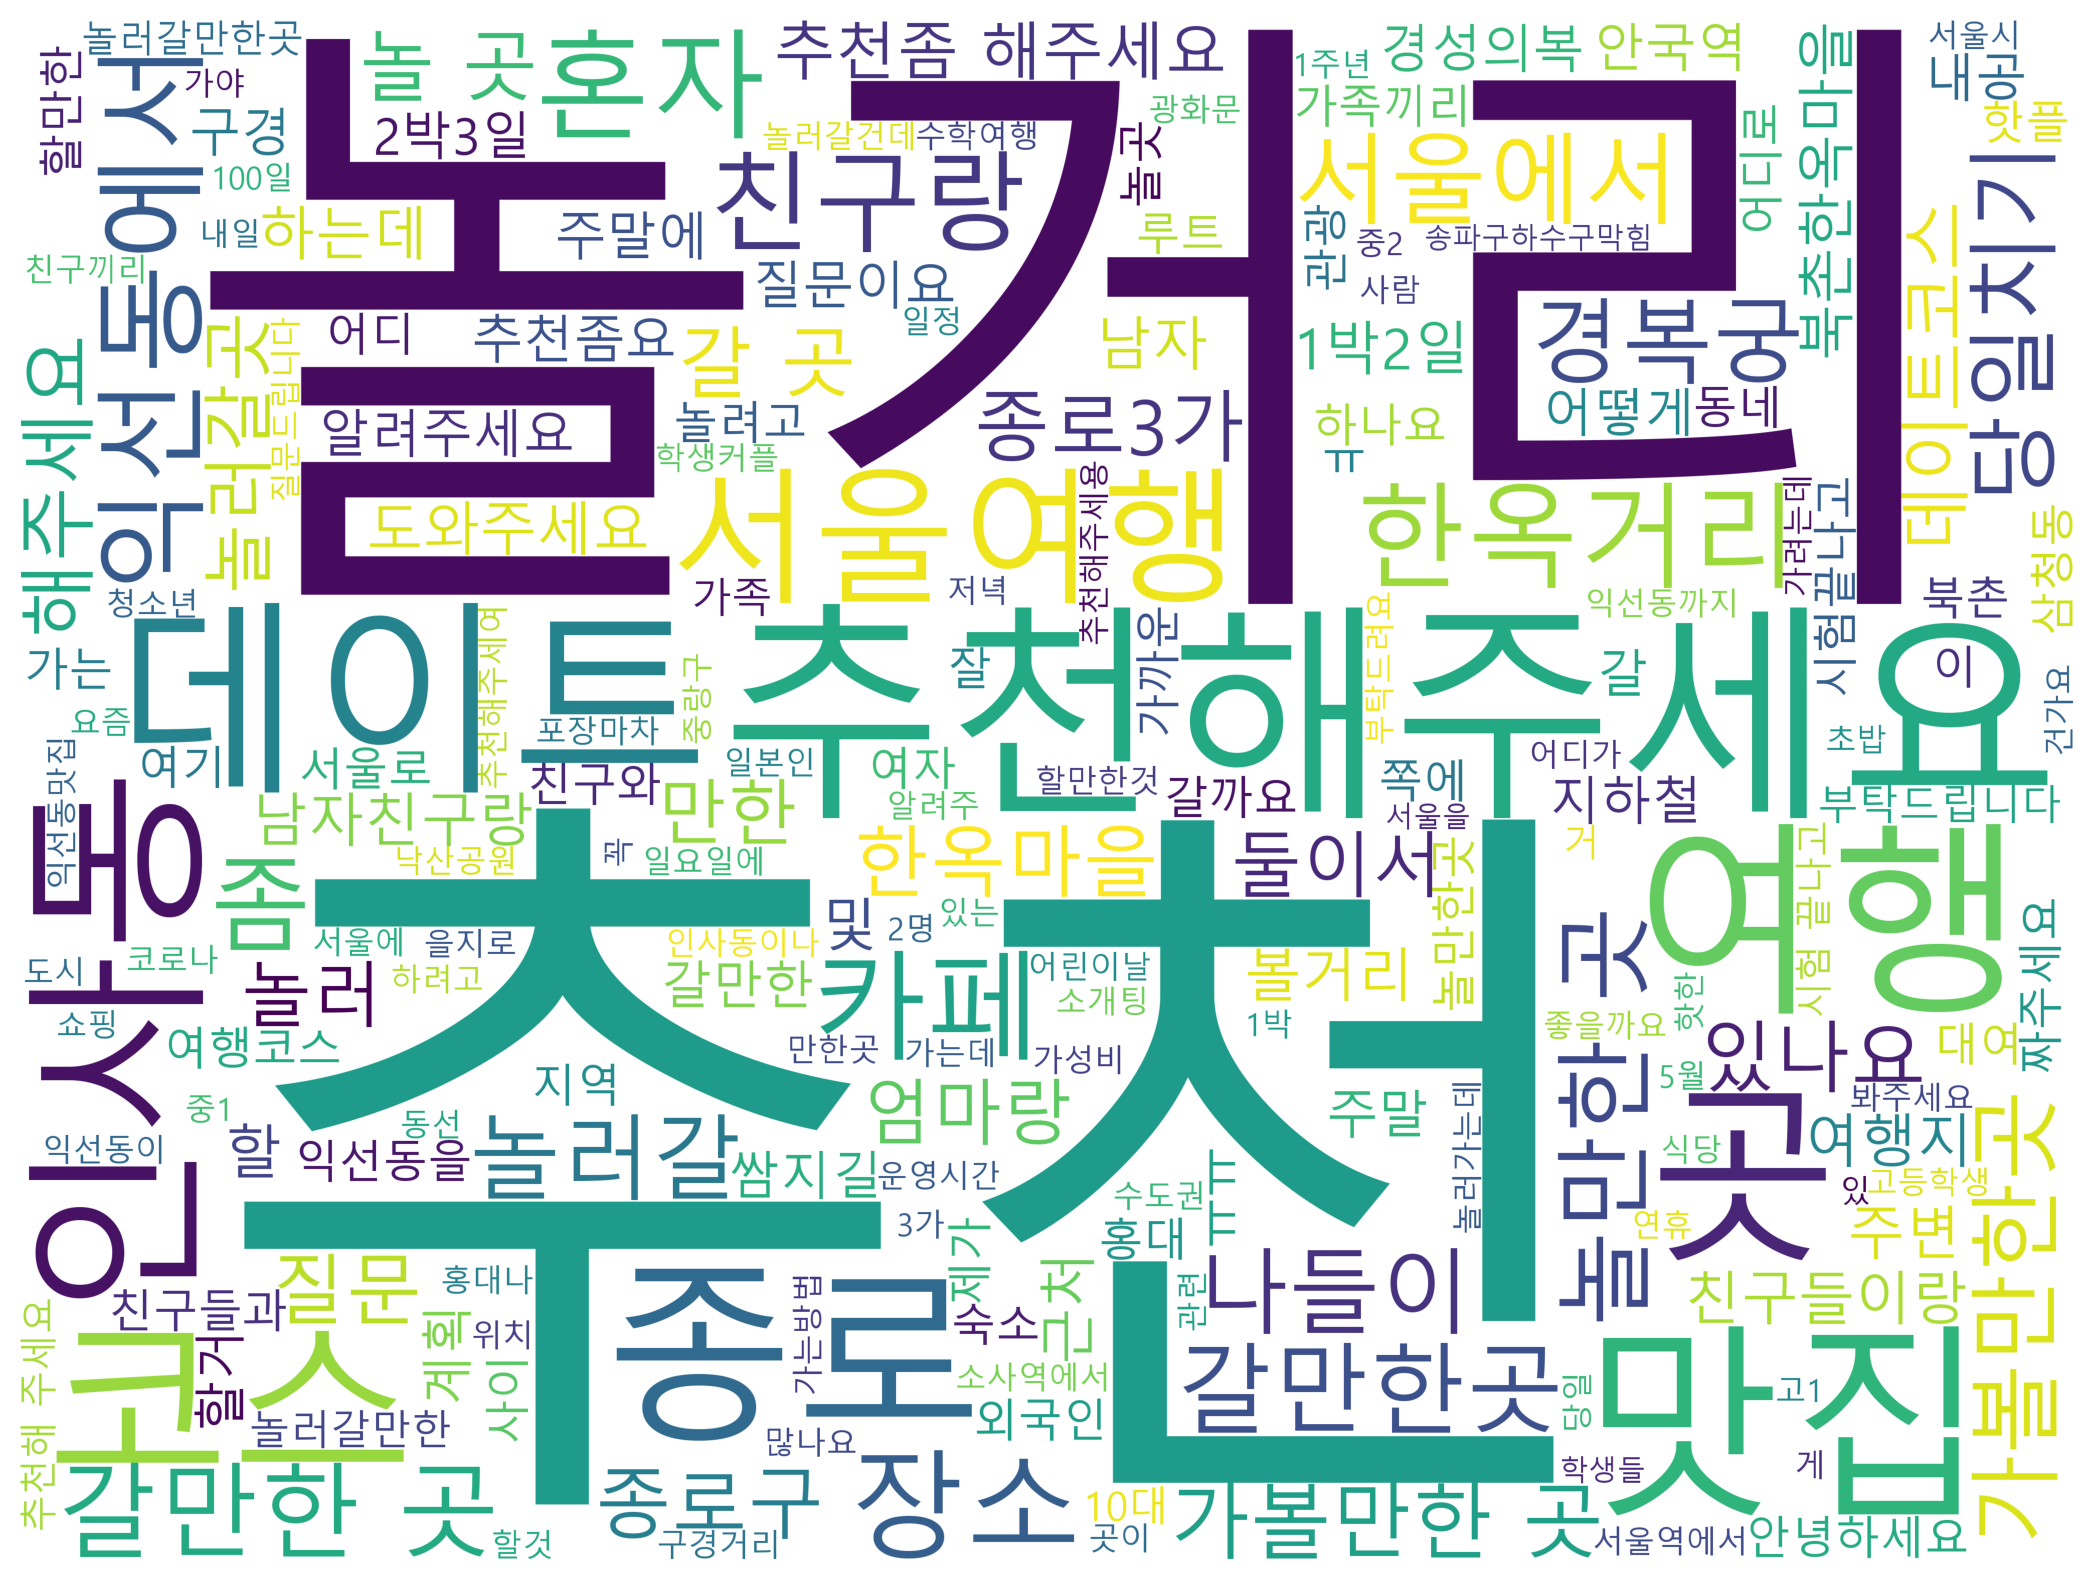

In [76]:
# 금지어 지정
stopWords = ['익선동', '익선동에', '서울']

wc1 = WordCloud(
    font_path = "c:\windows\fonts\malgun.ttf",
    stopwords = stopWords,
    background_color = 'white',
    width = 1024 *4,
    height = 768 *4,
    random_state=42
)

wc1.generate(word_str_cut)

# 결과를 그래프로 표시
plt.figure(figsize=(15,10))
plt.imshow(wc1)
plt.axis('off')
plt.show()

In [33]:
# 그래프, 이미지 그릴 때 사용하는 라이브러리
#! python -m pip install matplotlib

In [77]:
# 결과 이미지로 저장
wc1.to_file('data/익선동2.png')